In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime as dt
from collections import Counter
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
weather = pd.read_csv('POWER_Point_Hourly_20120101_20140228_051d5072N_000d1276E_LST_no_header.csv')

In [4]:
weather.head()

,YEAR,MO,DY,HR,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WD2M,WS10M,WD10M
0,2012,1,1,0,11.12,10.55,10.83,7.93,96.12,0.06,99.84,5.28,224.46,7.78,224.55
1,2012,1,1,1,11.06,10.53,10.80,7.93,96.38,0.04,99.79,5.19,226.58,7.68,226.57
2,2012,1,1,2,11.00,10.46,10.73,7.93,96.38,0.03,99.81,5.20,229.75,7.68,229.78
3,2012,1,1,3,10.99,10.44,10.72,7.93,96.31,0.03,99.80,5.05,230.97,7.46,230.99
4,2012,1,1,4,10.96,10.42,10.69,7.87,96.31,0.03,99.78,4.82,231.85,7.13,231.85


In [2]:
from statsmodels.tsa.ar_model import AutoReg

In [3]:
total_acorn = pd.read_parquet('total_acorn.gzip')
total_usage = pd.read_parquet('total_usage.gzip')

In [5]:
temp = pd.read_csv('temp.csv')
temp.head()

weather = pd.read_csv('weather.csv')
weather.head()

wind = pd.read_csv('2012_2014_wind_temp.csv')
wind.head()

,LAT,LON,YEAR,MO,DY,T2M
0,51.50831,-0.11539,2013,1,1,3.70
1,51.50831,-0.11539,2013,1,2,5.34
2,51.50831,-0.11539,2013,1,3,8.28
3,51.50831,-0.11539,2013,1,4,7.90
4,51.50831,-0.11539,2013,1,5,7.96


In [6]:
# read in weather data
weather_df = pd.read_csv('weather.csv')
new_dt=[]
for item in weather_df['DT']:
    item = dt.strptime(item, '%Y-%m-%d').strftime('%Y-%m-%d')
    new_dt.append(item)
weather_df['DT']=new_dt
weather_df=weather_df.set_index(weather_df['DT'])
display(weather_df)

,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE,WS50M_MIN,WS50M_MAX,WS10M_MIN,WS10M_MAX,WS50M,WS10M,DT
DT,,,,,,,,,,,,,,,,
2012-01-01,4.28,9.84,9.64,9.64,11.34,7.06,10.33,3.32,3.11,7.94,11.26,5.14,8.25,10.03,7.22,2012-01-01
2012-01-02,1.96,5.59,4.31,4.32,6.84,4.88,5.68,3.60,3.03,7.04,10.64,4.75,7.77,8.88,6.42,2012-01-02
2012-01-03,6.40,7.79,5.98,5.98,11.71,5.31,8.21,13.29,10.69,10.57,23.86,7.79,18.48,17.03,12.91,2012-01-03
2012-01-04,5.19,6.04,4.33,4.33,8.52,3.33,6.21,9.64,7.65,9.52,19.16,6.98,14.62,13.53,10.24,2012-01-04
2012-01-05,4.87,7.78,4.94,4.94,10.17,5.31,8.21,8.42,6.93,12.36,20.78,8.89,15.83,17.45,13.08,2012-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,5.42,3.02,1.67,1.68,6.80,1.38,2.46,11.61,9.61,7.91,19.52,5.88,15.49,11.93,9.41,2014-12-27
2014-12-28,6.24,0.56,-0.39,-0.38,4.63,-1.61,0.38,5.55,4.59,4.23,9.77,2.84,7.44,7.25,5.10,2014-12-28
2014-12-29,5.80,0.67,-0.08,-0.08,3.98,-1.82,0.16,3.15,2.48,4.16,7.31,3.16,5.64,6.30,4.52,2014-12-29


In [5]:
grouped_years = total_usage.groupby(total_usage.date_time.dt.year)

In [6]:
# Consumption data divided by year
consumption_2012 = total_usage[total_usage.date_time.dt.year == 2012]
consumption_2013 =  total_usage[total_usage.date_time.dt.year == 2013]
consumption_2014 =  total_usage[total_usage.date_time.dt.year == 2014]

In [7]:
# Consumption data with half hour mean across all houses
consumption_2012_hh_mean = consumption_2012.groupby([consumption_2012['date_time'], consumption_2012['treated']]).mean()
consumption_2012_hh_mean = consumption_2012_hh_mean.unstack()

consumption_2013_hh_mean = consumption_2013.groupby([consumption_2013['date_time'], consumption_2013['treated']]).mean()
consumption_2013_hh_mean = consumption_2013_hh_mean.unstack()

In [8]:
# get daily consumption averages to use exog of temp or wind
consumption_2012_daily_mean = consumption_2012.groupby([consumption_2012['date_time'].dt.date, consumption_2012['treated']]).mean()
consumption_2012_daily_mean = consumption_2012_daily_mean.unstack()
consumption_2012_daily_mean.head()

KWH/hh          
treated        False     True 
date_time                     
2012-01-01  0.259550  0.260731
2012-01-02  0.265449  0.267626
2012-01-03  0.266683  0.275281
2012-01-04  0.265846  0.267715
2012-01-05  0.269332  0.263935

In [9]:
# get daily consumption averages to use exog of temp or wind
consumption_2013_daily_mean = consumption_2013.groupby([consumption_2013['date_time'].dt.date, consumption_2013['treated']]).mean()
consumption_2013_daily_mean = consumption_2013_daily_mean.unstack()
print(consumption_2013_daily_mean.head())

              KWH/hh          
treated        False     True 
date_time                     
2013-01-01  0.250666  0.231662
2013-01-02  0.254633  0.233902
2013-01-03  0.241183  0.223092
2013-01-04  0.240085  0.230233
2013-01-05  0.248812  0.225436


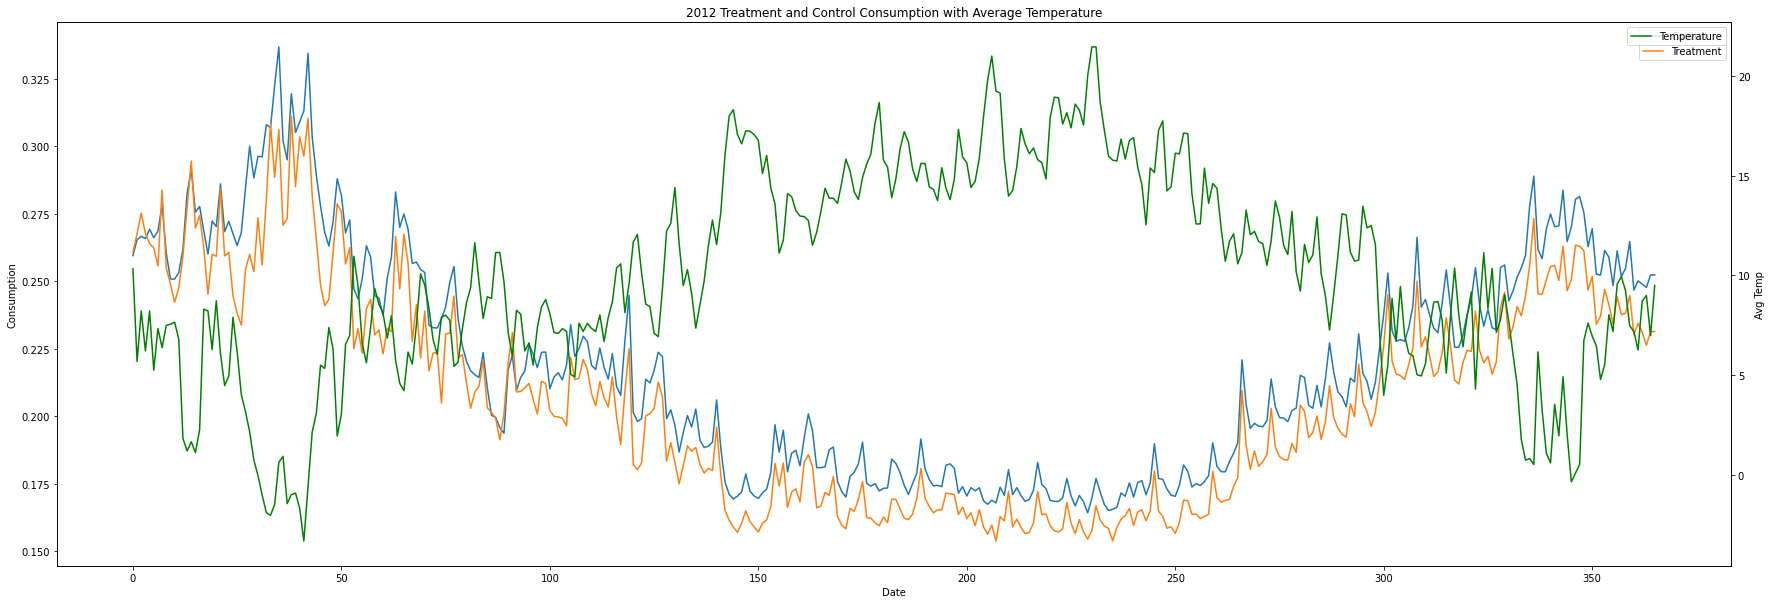

In [10]:
# General Plot of Treatment and Control with Temperature for 2012 --> training data plot
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(consumption_2012_daily_mean[('KWH/hh', False)].reset_index(drop=True), label='Control')
ax.plot(consumption_2012_daily_mean[('KWH/hh', True)].reset_index(drop=True), label='Treatment')
ax.set_xlabel('Date')
ax.set_ylabel('Consumption')
ax2 = ax.twinx()
ax2.set_ylabel('Avg Temp')
weather_plot = weather_df['T2M']['2012-01-01':'2012-12-31'].reset_index(drop=True)
ax2.plot(weather_plot, color='green', label='Temperature')
plt.title('2012 Treatment and Control Consumption with Average Temperature')
ax.legend()
ax2.legend()
plt.show()

In [3]:
# Weather data for 2013
weather_plot_2013 = weather_df['T2M']['2013-01-01':'2013-12-31'].reset_index(drop=True)

NameError: name 'consumption_2012_daily_mean' is not defined

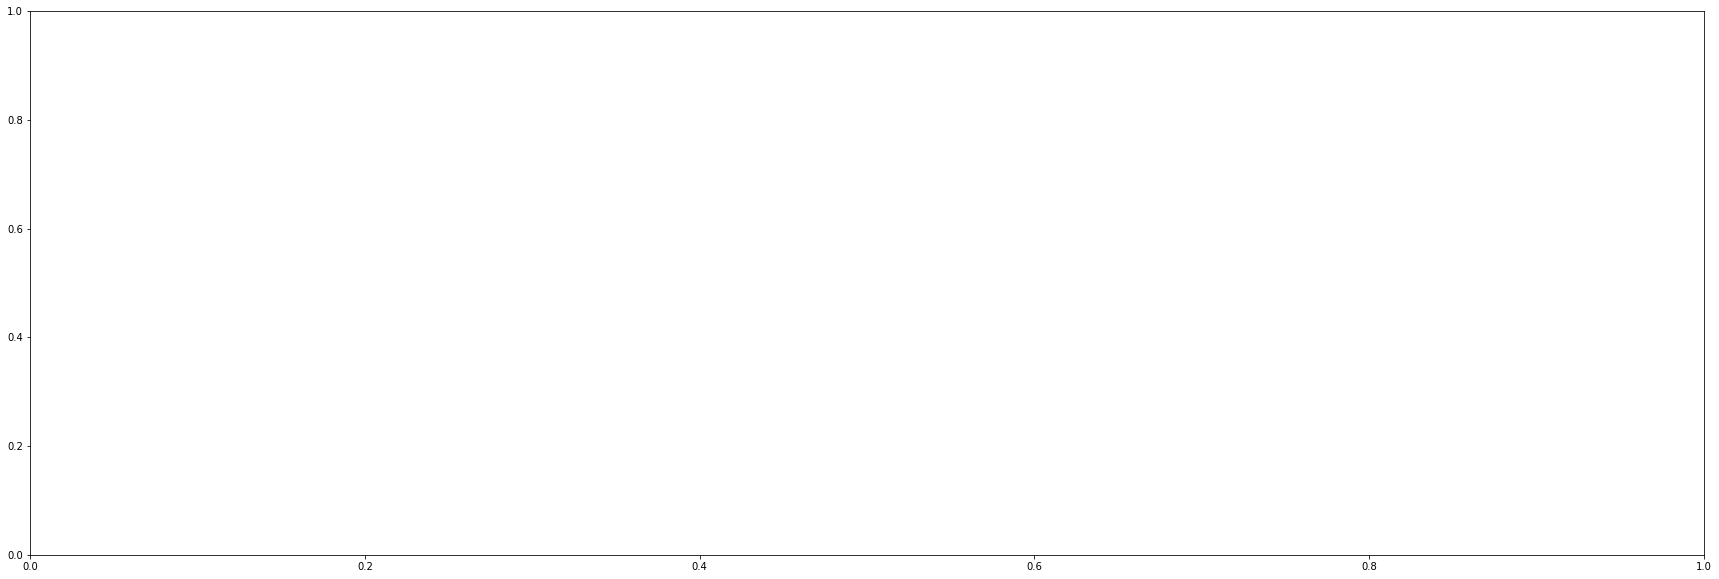

In [4]:
# General Plot of Treatment and Control with Wind for 2012 --> training data plot
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(consumption_2012_daily_mean[('KWH/hh', False)].reset_index(drop=True), label='Control')
ax.plot(consumption_2012_daily_mean[('KWH/hh', True)].reset_index(drop=True), label='Treatment')
ax.set_xlabel('Date')
ax.set_ylabel('Consumption')
ax2 = ax.twinx()
ax2.set_ylabel('Avg Wind 50m')
weather_plot = weather_df['WS50M']['2012-01-01':'2012-12-31'].reset_index(drop=True)
ax2.plot(weather_plot, color='green', label='Temperature')
plt.title('2012 Treatment and Control Consumption with Wind')
ax.legend()
ax2.legend()
plt.show()

In [13]:
# Here I am just differencing the daily mean data to make the data stationary
# cont_2012_diff = consumption_2012_daily_mean[('KWH/hh', False)].diff().reset_index(drop=True).dropna()
# treat_2012_diff = consumption_2012_daily_mean[('KWH/hh', True)].diff().reset_index(drop=True).dropna()
# cont_2012 = consumption_2012_daily_mean[('KWH/hh', False)].reset_index(drop=True).dropna()
# treat_2012= consumption_2012_daily_mean[('KWH/hh', True)].reset_index(drop=True).dropna()

In [14]:
# A way to test it the data is stationary - according to google the more negative the better. Lookes like our result is stationary?
# ad_fuller_result = adfuller(cont_2012_diff)

In [15]:
# print(ad_fuller_result)

In [16]:
# #plotting the acf and pacf - seems seasonal still
# plot_acf(cont_2012_diff)
# plot_pacf(cont_2012_diff)

In [17]:
# # Temp plotted with stationary data 2012
# fig, ax = plt.subplots(figsize=(30,10))
# ax.plot(cont_2012_diff, label='Control')
# ax.plot(treat_2012_diff, label='Treatment')
# ax.set_xlabel('Date')
# ax.set_ylabel('Consumption')
# ax2 = ax.twinx()
# ax2.set_ylabel('Avg Temp')
# weather_plot = weather_df['T2M']['2012-01-01':'2012-12-31'].reset_index(drop=True)
# ax2.plot(weather_plot, color='green', label='Temperature')
# plt.title('2012 Treatment and Control Consumption with Average Temperature')
# ax.legend()
# ax2.legend()
# plt.show()

In [18]:
train_ARIMA = consumption_2012_daily_mean[('KWH/hh', False)].reset_index(drop=True)
test_ARIMA = consumption_2013_daily_mean[('KWH/hh', False)].reset_index(drop=True)
weather_plot = weather_df['T2M']['2012-01-01':'2012-12-31'].reset_index(drop=True)

In [19]:
# fit model on control group data 2012, no exog variables
model_noexog = ARIMA(train_ARIMA, order=(2,1,1))
model_fit_noexog = model_noexog.fit()
print(model_fit_noexog.summary())

                               SARIMAX Results                                
Dep. Variable:      ('KWH/hh', False)   No. Observations:                  366
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1191.790
Date:                Thu, 20 May 2021   AIC                          -2375.580
Time:                        22:19:34   BIC                          -2359.980
Sample:                             0   HQIC                         -2369.380
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4837      0.102      4.762      0.000       0.285       0.683
ar.L2         -0.1557      0.063     -2.464      0.014      -0.280      -0.032
ma.L1         -0.6683      0.096     -6.948      0.0

In [20]:
# fit model on control group data 2012 with temp
model_exog = ARIMA(train_ARIMA, exog=weather_plot, order=(2,1,1))
model_fit_exog = model_exog.fit()
print(model_fit_exog.summary())

                               SARIMAX Results                                
Dep. Variable:      ('KWH/hh', False)   No. Observations:                  366
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1222.978
Date:                Thu, 20 May 2021   AIC                          -2435.956
Time:                        22:19:35   BIC                          -2416.456
Sample:                             0   HQIC                         -2428.206
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T2M           -0.0024      0.000     -9.339      0.000      -0.003      -0.002
ar.L1          0.3533      0.081      4.377      0.000       0.195       0.511
ar.L2         -0.1571      0.066     -2.389      0.0

In [21]:
# predict 2013 for both models
pred_noexog= model_fit_noexog.predict(start=366, end=366+364)
pred_exog= model_fit_exog.predict(start=366, end=366+364, exog=weather_plot_2013)

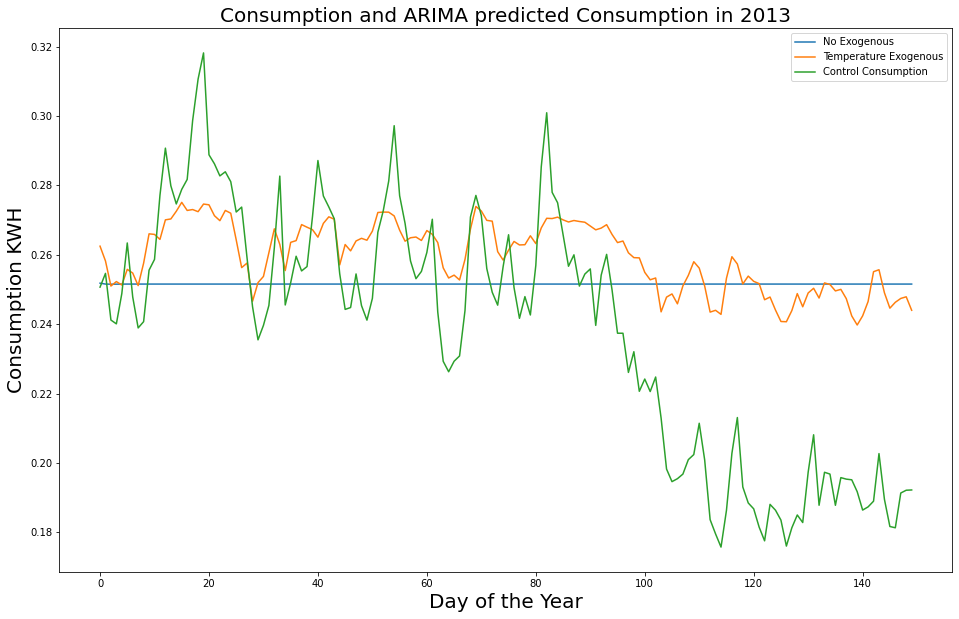

In [41]:
# graph predictions
ax, fig = plt.subplots(figsize=(16,10))
plt.plot(pred_noexog.reset_index(drop=True)[:150], label="No Exogenous")
plt.plot(pred_exog.reset_index(drop=True)[:150], label="Temperature Exogenous")
plt.plot(consumption_2013_daily_mean[('KWH/hh', False)].reset_index(drop=True)[:150], label="Control Consumption")
plt.legend()
plt.title("Consumption and ARIMA predicted Consumption in 2013", fontsize=20)
plt.ylabel("Consumption KWH", fontsize=20)
plt.xlabel("Day of the Year", fontsize=20 )
plt.savefig("ARIMA.png")
plt.show()


In [23]:
from sklearn.metrics import r2_score
r2_score_noexog=r2_score(pred_noexog.reset_index(drop=True),consumption_2013_daily_mean[('KWH/hh', False)] )
r2_score_exog= r2_score(pred_exog.reset_index(drop=True),consumption_2013_daily_mean[('KWH/hh', False)] )

print('No Exog: ', r2_score_noexog)
print('Exog:', r2_score_exog)

MAPE_no_exog=mean_absolute_percentage_error(test_ARIMA, pred_noexog)
MAPE_exog=mean_absolute_percentage_error(test_ARIMA, pred_exog)

print('No Exog: ', MAPE_no_exog)
print('Exog:', MAPE_exog)

No Exog:  -15365325.03022389
Exog: -8.835111672652806
No Exog:  0.23806299852163376
Exog: 0.19756833755634834


In [24]:
print(consumption_2012_daily_mean[('KWH/hh', False)].reset_index(drop=True))

0      0.259550
1      0.265449
2      0.266683
3      0.265846
4      0.269332
         ...   
361    0.250164
362    0.248926
363    0.247728
364    0.252378
365    0.252353
Name: (KWH/hh, False), Length: 366, dtype: float64


<class 'list'>


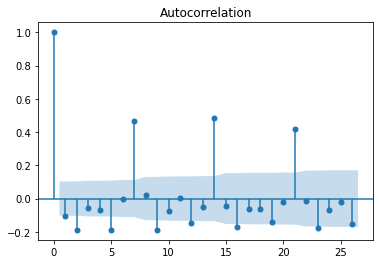

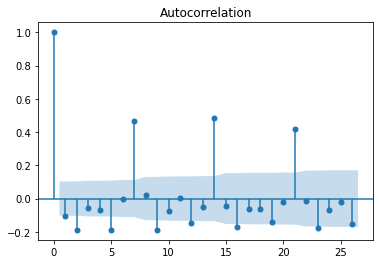

In [25]:
# Make the training data the control group in 2012
train_2012_daily_mean = consumption_2012_daily_mean[('KWH/hh', False)].dropna().tolist()
print(type(train_2012_daily_mean))
#Check what order AR or MA model is good
plot_acf(consumption_2012_daily_mean[('KWH/hh', False)].diff()[1:])
#plot_pacf()

In [26]:
AR_noexog_model = AutoReg(train_2012_daily_mean,lags=7)
AR_noexog_fitted = AR_noexog_model.fit()

AR_noexog_pred = AR_noexog_fitted.predict(start=366, end=366+364)

r2_score_noexog=r2_score(AR_noexog_pred,consumption_2013_daily_mean[('KWH/hh', False)] )
print("No Exog AR:", r2_score_noexog)

No Exog AR: -14.18294401948392


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [27]:
predictions_AR=[]
predictions_scores_AR=[]

i=0
while i <=7:
    
    AR_noexog_model = AutoReg(train_2012_daily_mean,lags=i)
    AR_noexog_fitted = AR_noexog_model.fit()

    AR_noexog_pred = AR_noexog_fitted.predict(start=366, end=366+364)
    predictions_AR.append(AR_noexog_pred)
    r2_score_noexog=r2_score(AR_noexog_pred,consumption_2013_daily_mean[('KWH/hh', False)] )
    predictions_scores_AR.append(r2_score_noexog)
    print("No Exog AR" ,i, ": " , r2_score_noexog)
    i+=1

No Exog AR 0 :  -2.1947209420895947e+29
No Exog AR 1 :  -30.638236464486425
No Exog AR 2 :  -24.814323887236267
No Exog AR 3 :  -18.47467850432137
No Exog AR 4 :  -16.357267482333313
No Exog AR 5 :  -14.122702307238674
No Exog AR 6 :  -14.302814294720882
No Exog AR 7 :  -14.18294401948392


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names

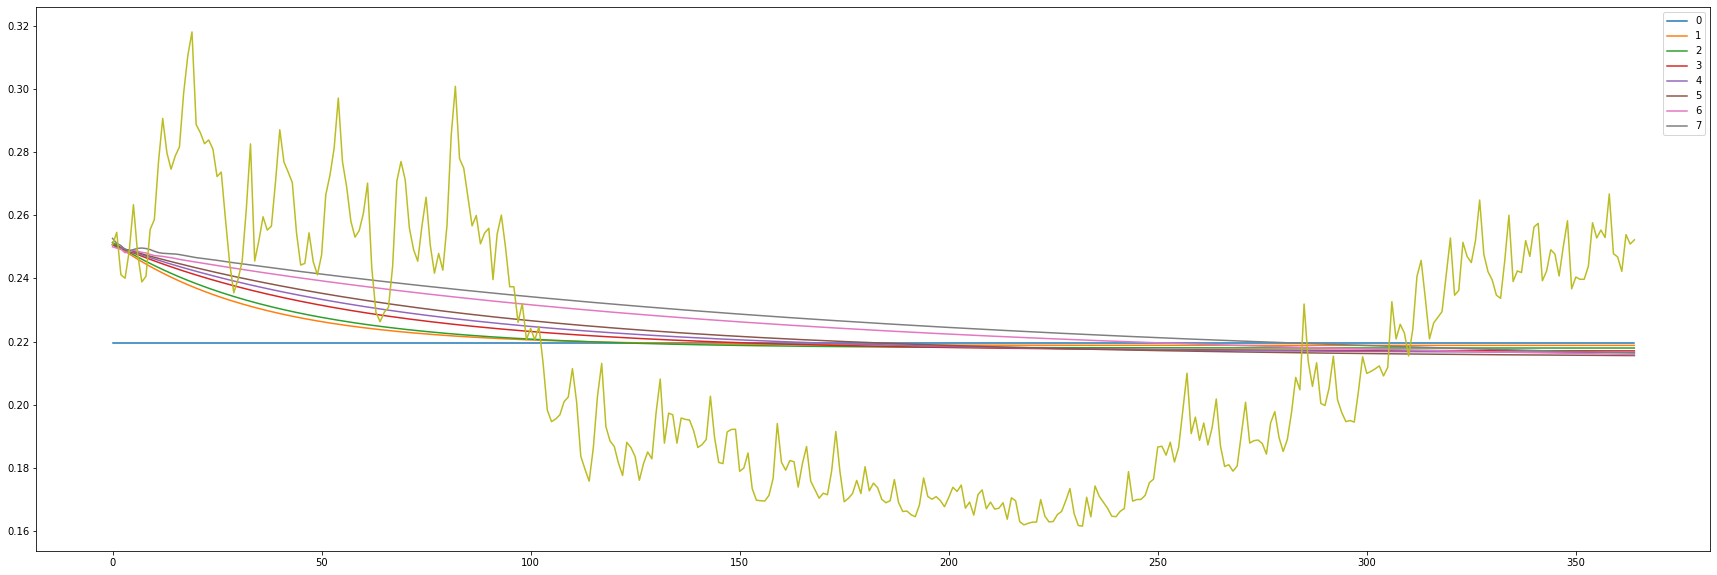

In [28]:
#plot all predicitions of AR without exog
fig, ax = plt.subplots(figsize=(30,10))
for i in range(len(predictions_AR)):
    ax.plot(predictions_AR[i], label=i)
ax.plot(consumption_2013_daily_mean[('KWH/hh', False)].reset_index(drop=True))
plt.legend()

In [29]:
# Same Concept with ARIMA
predictions_ARIMA=[]
predictions_scores_ARIMA=[]
ARIMA_orders=[]

i=0
j=0
while i <=7:
    while j<=7:
        order_ARIMA=(i,1,j)
        ARIMA_orders.append(order_ARIMA)
        ARIMA_noexog_model = ARIMA(train_2012_daily_mean,order=order_ARIMA)
        ARIMA_noexog_fitted = ARIMA_noexog_model.fit()

        ARIMA_noexog_pred = ARIMA_noexog_fitted.predict(start=366, end=366+364, dynamic=False)
        predictions_ARIMA.append(ARIMA_noexog_pred)
        r2_score_noexog=r2_score(ARIMA_noexog_pred,consumption_2013_daily_mean[('KWH/hh', False)] )
        predictions_scores_ARIMA.append(r2_score_noexog)
        print("No Exog ARIMA (" ,i,',1,',j, "): " , r2_score_noexog)
        j+=1
    j=0
    i+=1

No Exog ARIMA ( 0 ,1, 0 ):  0.0
No Exog ARIMA ( 0 ,1, 1 ):  -9.54951747940631e+29
No Exog ARIMA ( 0 ,1, 2 ):  -453418233.0006915
No Exog ARIMA ( 0 ,1, 3 ):  -47712835.8077851
No Exog ARIMA ( 0 ,1, 4 ):  -30608159.187058117
No Exog ARIMA ( 0 ,1, 5 ):  -5509313.807703875


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 0 ,1, 6 ):  -300642.3492504962
No Exog ARIMA ( 0 ,1, 7 ):  -87671.13920053391
No Exog ARIMA ( 1 ,1, 0 ):  -17838301443440.082
No Exog ARIMA ( 1 ,1, 1 ):  -3311303.0893047103


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


No Exog ARIMA ( 1 ,1, 2 ):  -83734867.81120381
No Exog ARIMA ( 1 ,1, 3 ):  -51387517.75054462
No Exog ARIMA ( 1 ,1, 4 ):  -18134387.835342962


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 1 ,1, 5 ):  -38231955.82994067


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 1 ,1, 6 ):  -236956.30487517855
No Exog ARIMA ( 1 ,1, 7 ):  -93062.21137659649
No Exog ARIMA ( 2 ,1, 0 ):  -14677659.995343726
No Exog ARIMA ( 2 ,1, 1 ):  -15365325.03022389


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


No Exog ARIMA ( 2 ,1, 2 ):  -129811.88971169989


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


No Exog ARIMA ( 2 ,1, 3 ):  -8767096.093701521


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 2 ,1, 4 ):  -226639.52994542388


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 2 ,1, 5 ):  -354236.714599842


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 2 ,1, 6 ):  -203289.217374286
No Exog ARIMA ( 2 ,1, 7 ):  -42616.77618424682
No Exog ARIMA ( 3 ,1, 0 ):  -9645459.903667351
No Exog ARIMA ( 3 ,1, 1 ):  -10947390.03565587


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as sta

No Exog ARIMA ( 3 ,1, 2 ):  -15126072.951560175


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 3 ,1, 3 ):  -31837502.584660947


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 3 ,1, 4 ):  -365927.11713044165


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 3 ,1, 5 ):  -496254.78282130574


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 3 ,1, 6 ):  -268628.04038464586


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 3 ,1, 7 ):  -53289.60294254108
No Exog ARIMA ( 4 ,1, 0 ):  -3995914.186656803


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


No Exog ARIMA ( 4 ,1, 1 ):  -1439006.4215430566
No Exog ARIMA ( 4 ,1, 2 ):  -2190146.75942277


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 4 ,1, 3 ):  -3063825.70792832


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 4 ,1, 4 ):  -218947.4133939091


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 4 ,1, 5 ):  -55819.75228181781


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 4 ,1, 6 ):  -24360.55131620547


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 4 ,1, 7 ):  -18817.607248954664
No Exog ARIMA ( 5 ,1, 0 ):  -940319.0110727282
No Exog ARIMA ( 5 ,1, 1 ):  -639197.8473621877


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as sta

No Exog ARIMA ( 5 ,1, 2 ):  -54766.66420677766


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 5 ,1, 3 ):  -65853.97096227293


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 5 ,1, 4 ):  -56380.88936387121


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 5 ,1, 5 ):  -86173.80778706197


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 5 ,1, 6 ):  -1344.1938657258838


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 5 ,1, 7 ):  -28002.313145550903
No Exog ARIMA ( 6 ,1, 0 ):  -161133.3230603659


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 6 ,1, 1 ):  -65994.88805453904


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


No Exog ARIMA ( 6 ,1, 2 ):  -53690.72987505295


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 6 ,1, 3 ):  -28442.833699768802


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 6 ,1, 4 ):  -20891.630311003915


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 6 ,1, 5 ):  -12949.891892693731


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 6 ,1, 6 ):  -11176.401940421089


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 6 ,1, 7 ):  -38322.132375513655


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 7 ,1, 0 ):  -18917.77091142642


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 7 ,1, 1 ):  -18140.178783546362


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


No Exog ARIMA ( 7 ,1, 2 ):  -15335.875849859307


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 7 ,1, 3 ):  -15731.113072046817
No Exog ARIMA ( 7 ,1, 4 ):  -16281.315953257505


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 7 ,1, 5 ):  -19653.115007953125


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No Exog ARIMA ( 7 ,1, 6 ):  -21232.005646848917
No Exog ARIMA ( 7 ,1, 7 ):  -22024.256998041994


c:\users\landw\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


NameError: name 'ARIMA_pred' is not defined

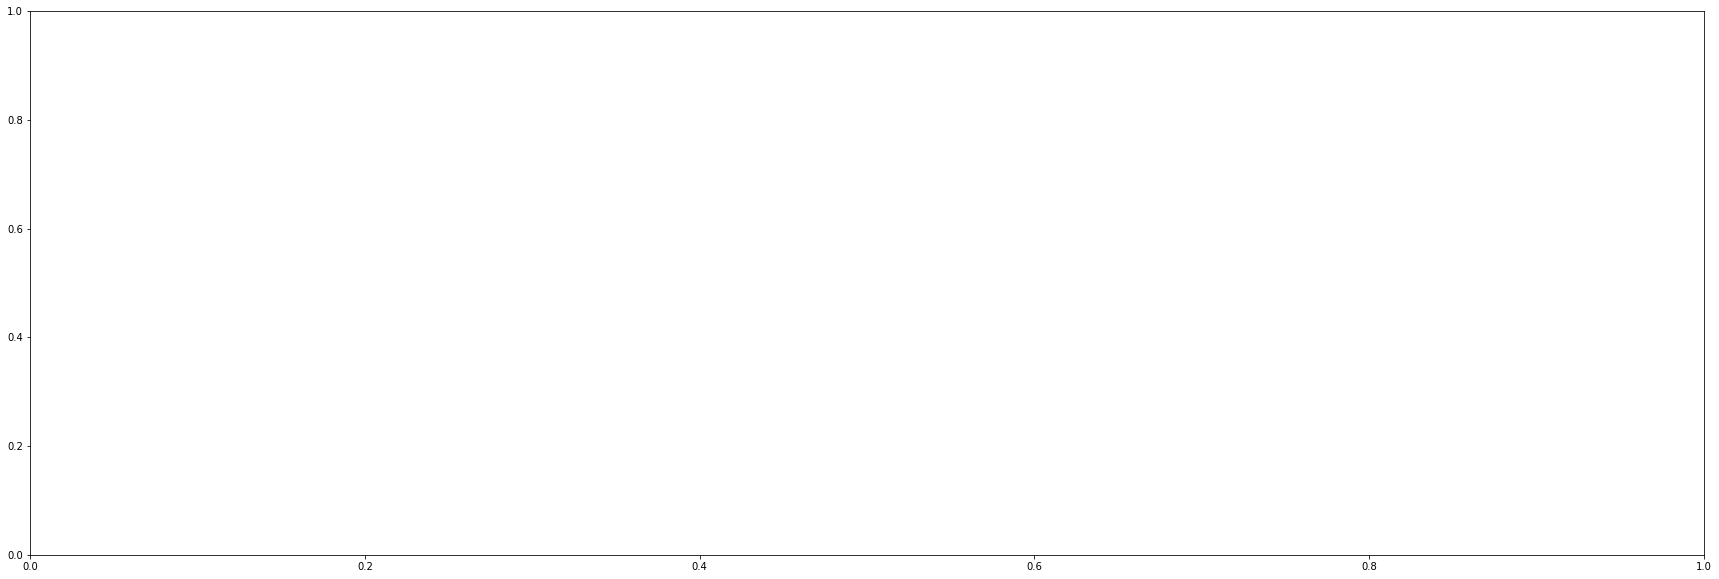

In [30]:
# plot best 5 predicitions of ARIMA without exog
fig, ax = plt.subplots(figsize=(30,10))
i=0
while i <=5:
    ax.plot(ARIMA_pred['predictions'][i], label=ARIMA_pred['order'][i])
    i+=1
ax.plot(consumption_2013_daily_mean[('KWH/hh', False)].reset_index(drop=True), label='True')
plt.legend()

In [ ]:
#Make a dataframe of predictions
ARIMA_pred= pd.DataFrame()
ARIMA_pred['order']=ARIMA_orders
ARIMA_pred['fit']=predictions_scores_ARIMA
ARIMA_pred['predictions']=predictions_ARIMA

ARIMA_pred=ARIMA_pred.sort_values('fit', ascending=False)
display(ARIMA_pred)

In [ ]:
# Same Concept with ARIMA exog
predictions_ARIMA_exog=[]
predictions_scores_ARIMA_exog=[]
ARIMA_orders_exog=[]

i=0
j=0
while i <=7:
    while j<=7:
        order_ARIMA=(i,1,j)
        ARIMA_orders_exog.append(order_ARIMA)
        ARIMA_model_exog = ARIMA(train_2012_daily_mean, exog=weather_plot ,order=order_ARIMA)
        ARIMA_fitted_exog = ARIMA_model_exog.fit()
        print(ARIMA_fitted_exog.rsquared_adj)

        ARIMA_pred_exog = ARIMA_fitted_exog.predict(start=366, end=366+364,exog=weather_plot_2013, dynamic=False, suppress_warnings=True)
        predictions_ARIMA_exog.append(ARIMA_pred_exog)
        r2_score_exog=r2_score(ARIMA_pred_exog,consumption_2013_daily_mean[('KWH/hh', False)] )
        predictions_scores_ARIMA_exog.append(r2_score_exog)
        print("Exog ARIMA (" ,i,',1,',j, "): " , r2_score_exog)
        j+=1
    j=0
    i+=1

In [ ]:
#Make a dataframe of predictions
ARIMA_pred_exog= pd.DataFrame()
ARIMA_pred_exog['order']=ARIMA_orders_exog
ARIMA_pred_exog['fit']=predictions_scores_ARIMA_exog
ARIMA_pred_exog['predictions']=predictions_ARIMA_exog

ARIMA_pred_exog=ARIMA_pred_exog.sort_values('fit', ascending=False)
display(ARIMA_pred_exog)

In [ ]:
# plot best 5 predicitions of ARIMA without exog
fig, ax = plt.subplots(figsize=(30,10))
i=0
while i <=5:
    ax.plot(ARIMA_pred_exog['predictions'][i].reset_index(drop=True), label=ARIMA_pred['order'][i])
    i+=1
ax.plot(consumption_2013_daily_mean[('KWH/hh', False)].reset_index(drop=True), label='True')
ax.plot()
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(consumption_2012_daily_mean[('KWH/hh', False)])
ax.plot(consumption_2013_daily_mean[('KWH/hh', False)])

In [ ]:
# Try a monthly prediciton
consumption_2012_hh_mean_jan = consumption_2012_hh_mean['2012/01/01':'2012/02/01']
consumption_2012_hh_mean_feb = consumption_2012_hh_mean['2012/02/01':'2012/03/01']

In [ ]:
train=consumption_2012_hh_mean_jan[('KWH/hh',False)]
test=consumption_2012_hh_mean_feb[('KWH/hh',False)]
plt.plot(train)

In [ ]:
model_month = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=7, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_month.summary())

In [ ]:
# Forecast
n_periods = 30*48
fc, confint = model_month.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
#plt.plot(consumption_2013_daily_mean[('KWH/hh', False)].reset_index(np.arange(366,366+365), inplace=True))
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast Consumption")
plt.show()

In [ ]:
# Tyring using SARIMAX
consumption_2012_hh_mean_jan = consumption_2012_hh_mean['2012/01/01':'2012/02/01']
consumption_2012_hh_mean_feb = consumption_2012_hh_mean['2012/02/01':'2012/03/01']

In [ ]:
model_sari = SARIMAX(consumption_2012_hh_mean_jan[('KWH/hh',False)], order=(1,1,1), seasonal_order=(7,1,1,2))
results_sari = model_sari.fit()

In [ ]:
print(len(consumption_2012_hh_mean_jan[('KWH/hh',False)]))

In [ ]:
forecast_sari = results_sari.predict(start=1537, end=1537+1536)

In [ ]:
forecast_sari_jan2012 = results_sari.predict(start='2012/01/01', end='2012/01/31')
forecast_sari_feb_2012 = results_sari.predict(start='2012/02/01', end='2012/02/28')

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(consumption_2012_hh_mean_jan[('KWH/hh', False)])
#ax.plot(consumption_2013_hh_mean[('KWH/hh', False)]['2013/01/01':'2013/01/31'])
#ax.plot(forecast_sari)
ax.plot(forecast_sari_jan2012)
ax.plot(forecast_sari_feb_2012)
#ax.plot(consumption_2012_hh_mean_feb)

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
#ax.plot(cont_2012)
ax.plot(forecast_sari)
#ax.plot(consumption_2013_daily_mean[('KWH/hh', False)])